# Modelo de Predador-Presa de Lotka-Volterra


C:\Users\valen\AppData\Local\Temp\ipykernel_3664\378400229.py:25: RuntimeWarning: invalid value encountered in divide
  dN_normalized = dN / magnitude
C:\Users\valen\AppData\Local\Temp\ipykernel_3664\378400229.py:26: RuntimeWarning: invalid value encountered in divide
  dP_normalized = dP / magnitude


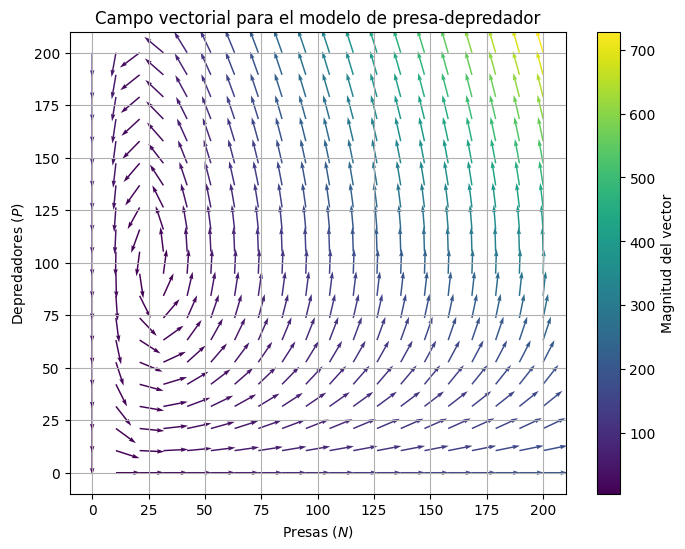

In [8]:
import numpy as np
import matplotlib.pyplot as plt


r = 1.0  
alpha = 0.01  
beta = 0.02 
q = 0.5  

# Function to compute derivatives
def lotka_volterra(t, Y):
    N, P = Y
    dNdt = r * N - alpha * N * P
    dPdt = beta * N * P - q * P
    return np.array([dNdt, dPdt])

# Create a grid
N_range = np.linspace(0, 200, 20)
P_range = np.linspace(0, 200, 20)
N, P = np.meshgrid(N_range, P_range)

# Compute the vector field
dN, dP = lotka_volterra(None, [N, P])
magnitude = np.sqrt(dN**2 + dP**2)
dN_normalized = dN / magnitude
dP_normalized = dP / magnitude

# Create the plot
plt.figure(figsize=(8, 6))
plt.quiver(N, P, dN_normalized, dP_normalized, magnitude, scale=20, cmap='viridis')
plt.xlabel('Presas ($N$)')
plt.ylabel('Depredadores ($P$)')
plt.title('Campo vectorial para el modelo de presa-depredador')
plt.colorbar(label='Magnitud del vector')
plt.grid(True)
plt.show()



## Puntos fijos en el sistema

Hay 2 puntos fijos en el sistema:

El (0,0), que es inestable, una pequeña perturbación en el sistema cambia totalmente, en (0, 0) el Jacobiano es [[r, 0], [0, -q]], es decir que los autovalores tienen signo opuesto y por eso son inestables.

El otro punto fijo es (q/b, r/a), y los autovalores son IMAGINARIOS (comportamiento oscilatorio)

C:\Users\valen\AppData\Local\Temp\ipykernel_3664\3784469553.py:9: RuntimeWarning: invalid value encountered in divide
  dN_normalized = dN / magnitude
C:\Users\valen\AppData\Local\Temp\ipykernel_3664\3784469553.py:10: RuntimeWarning: invalid value encountered in divide
  dP_normalized = dP / magnitude


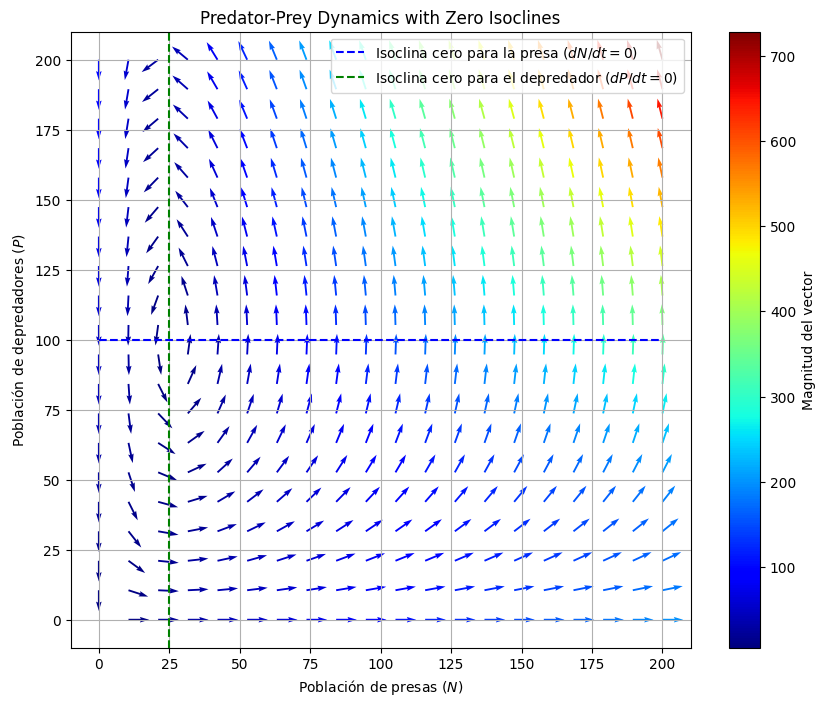

In [9]:


# Create a grid
N_range = np.linspace(0, 200, 20)
P_range = np.linspace(0, 200, 20)
N, P = np.meshgrid(N_range, P_range)

# Compute the vector field
dN, dP = lotka_volterra(None, [N, P])
magnitude = np.sqrt(dN**2 + dP**2)
dN_normalized = dN / magnitude
dP_normalized = dP / magnitude

# Zero isoclines
P_isocline_N = np.full_like(N_range, r / alpha)
N_isocline_P = np.full_like(P_range, q / beta)

# Create the plot
plt.figure(figsize=(10, 8))
plt.quiver(N, P, dN_normalized, dP_normalized, magnitude, scale=30, cmap=plt.cm.jet)
plt.plot(N_range, P_isocline_N, 'b--', label='Isoclina cero para la presa ($dN/dt = 0$)')
plt.axvline(x=q / beta, color='g', linestyle='--', label='Isoclina cero para el depredador ($dP/dt = 0$)')

plt.xlabel('Población de presas ($N$)')
plt.ylabel('Población de depredadores ($P$)')
plt.title('Predator-Prey Dynamics with Zero Isoclines')
plt.legend()
plt.colorbar(label='Magnitud del vector')
plt.grid(True)
plt.show()


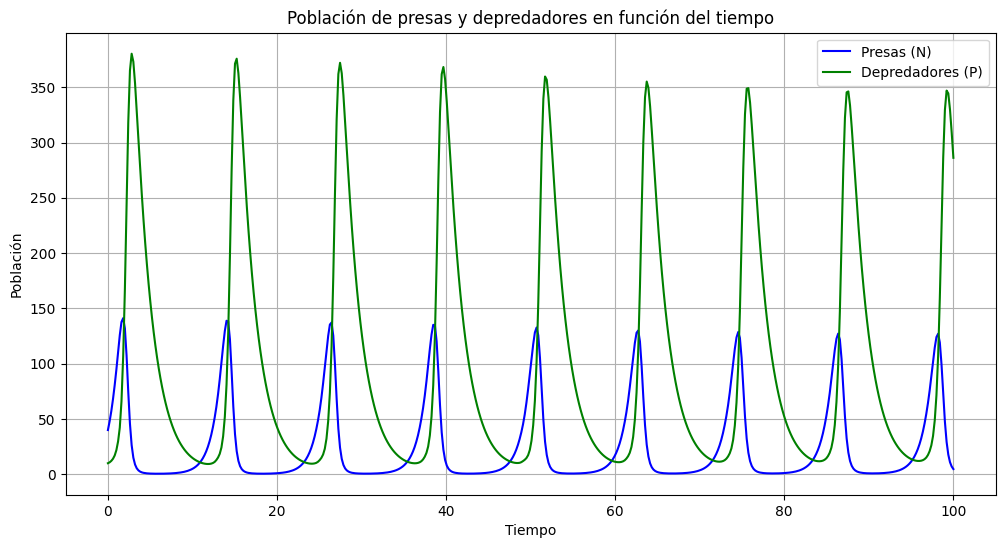

In [10]:

from scipy.integrate import solve_ivp

# Initial conditions
N0 = 40  # Initial prey population
P0 = 10  # Initial predator population
initial_conditions = [N0, P0]

# Time vector
t = np.linspace(0, 100, 500)  # Time from 0 to 100 in 500 steps

# Solve the differential equations using Runge-Kutta method (RK45)
solution = solve_ivp(lotka_volterra, [t.min(), t.max()], initial_conditions, t_eval=t, method='RK45')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(solution.t, solution.y[0], label='Presas (N)', color='blue')
plt.plot(solution.t, solution.y[1], label='Depredadores (P)', color='green')
plt.title('Población de presas y depredadores en función del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Población')	
plt.legend()
plt.grid(True)
plt.show()


# Modelo extendido de presa-depredador

In [11]:
# Define ranges for N and create P based on isocline equations
N = np.linspace(0, K, 400)
P_prey = (r / alpha) * (1 - N / K)  # Zero isocline for prey
N_predator = np.full_like(N, q / beta)  # Zero isocline for predator

# Plotting the isoclines
plt.figure(figsize=(10, 8))
plt.plot(N, P_prey, label='Prey Zero Isocline ($dN/dt = 0$)', color='blue')
plt.axvline(x=q / beta, label='Predator Zero Isocline ($dP/dt = 0$)', color='red')
plt.xlim(0, K)
plt.ylim(0, max(P_prey) + 5)
plt.xlabel('Prey Population ($N$)')
plt.ylabel('Predator Population ($P$)')
plt.title('Zero Isoclines for Extended Predator-Prey Model')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'K' is not defined

C:\Users\valen\AppData\Local\Temp\ipykernel_9492\2871033246.py:23: RuntimeWarning: invalid value encountered in divide
  dN_normalized = dN / magnitude
C:\Users\valen\AppData\Local\Temp\ipykernel_9492\2871033246.py:24: RuntimeWarning: invalid value encountered in divide
  dP_normalized = dP / magnitude


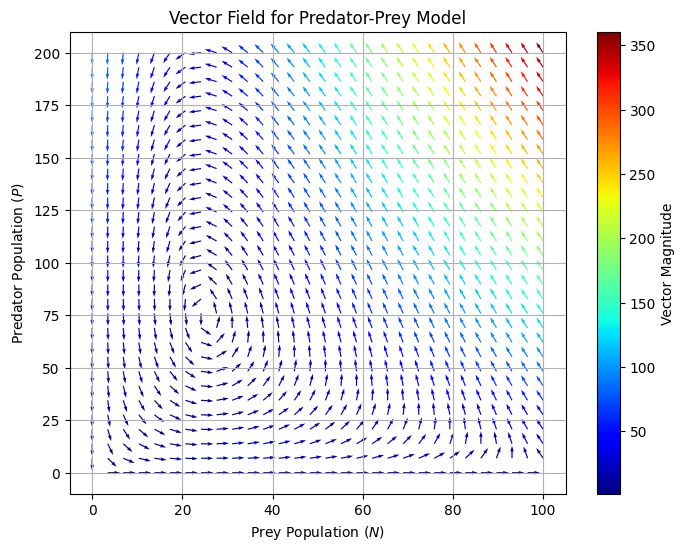

In [ ]:

# Model parameters
r = 1.0  # Rate of increase of prey
K = 100  # Carrying capacity of prey
alpha = 0.01  # Predation rate coefficient
beta = 0.02  # Conversion rate of prey into predator offspring
q = 0.5  # Natural death rate of predators

# Function to compute derivatives
def extended_lotka_volterra(t, Y):
    N, P = Y
    dNdt = r * N * (1 - N / K) - alpha * N * P
    dPdt = beta * N * P - q * P
    return np.array([dNdt, dPdt])

# Create a grid
N_range = np.linspace(0, K, 30)
P_range = np.linspace(0, 200, 30)
N, P = np.meshgrid(N_range, P_range)

# Compute the vector field
dN, dP = extended_lotka_volterra(None, [N, P])
magnitude = np.sqrt(dN**2 + dP**2)
dN_normalized = dN / magnitude
dP_normalized = dP / magnitude

# Create the plot
plt.figure(figsize=(8, 6))
plt.quiver(N, P, dN_normalized, dP_normalized, magnitude, scale=40, cmap=plt.cm.jet)
plt.xlabel('Prey Population ($N$)')
plt.ylabel('Predator Population ($P$)')
plt.title('Vector Field for Predator-Prey Model')
plt.colorbar(label='Vector Magnitude')
plt.grid(True)
plt.show()


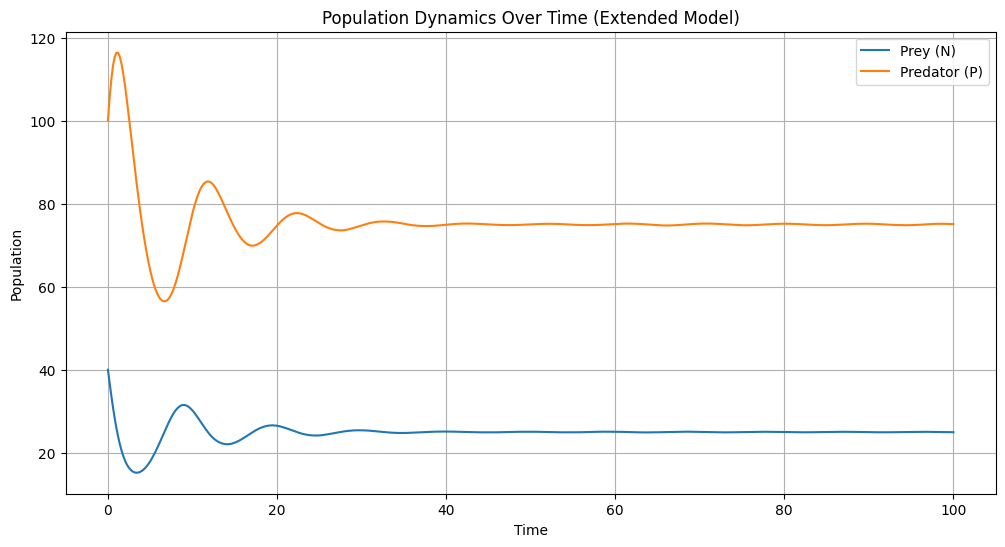

In [ ]:
# Time vector
t = np.linspace(0, 100, 500)  # Time from 0 to 100 in 500 steps

initial_conditions = [40, 100]  # Initial conditions
# Solve the differential equations using the Runge-Kutta method (RK45)
solution = solve_ivp(extended_lotka_volterra, [t.min(), t.max()], initial_conditions, t_eval=t, method='RK45')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(solution.t, solution.y[0], label='Prey (N)')
plt.plot(solution.t, solution.y[1], label='Predator (P)')
plt.title('Population Dynamics Over Time (Extended Model)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Parameters
r, K, alpha, beta, q = 1.0, 100, 0.01, 0.02, 0.5
N, P = np.array([q/beta, r/alpha * (1 - q/(beta*K))])

# Jacobian at (N, P)
J = np.array([
    [r * (1 - 2 * N / K) - alpha * P, -alpha * N],
    [beta * P, beta * N - q]
])

# Eigenvalues
eigenvalues = np.linalg.eigvals(J)
print("Eigenvalues:", eigenvalues)


Eigenvalues: [-0.125+0.59947894j -0.125-0.59947894j]
